# Car racing game agent evolving through iterations of NEAT algorithm


**Import of the different functions defined to build a track and move the car around it**

In [1]:
using Plots
using Random
using Distributions

Random.seed!(123)

Base.copy(x::T) where T = T([deepcopy(getfield(x, k)) for k ∈ fieldnames(T)]...)

We use a mutable structure ${track}$ which is an array of Int64. It is initialized with only zeros representing blank parts.

In [2]:
mutable struct track
    road::Array{Int64}
end

function track(n::Int64)
    track(zeros(n,n))
end

track

We then define several functions dictating the movement of the car around the track.

In [3]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [h+larg - j for j in 1:larg] #ones(larg)*(h+larg-i)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+larg-i)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos-n
    end
    
    r[pos]=h
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [h+larg - j for j in 1:larg] # ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=h
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = ones(larg)*h
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = ones(long)*h
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = ones(larg)*h
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = ones(long)*h
        end
        pos = pos-long
    end
    
    r[pos]=h
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = short!(tr,pos,dir,larg,h)
    (pos,dir) = short!(tr,pos,dir,larg,h+3)
    (pos,dir) = short!(tr,pos,dir,larg,h+6)
    (pos,dir) = short!(tr,pos,dir,larg,h+9)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+1)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+2)
end

short! (generic function with 1 method)

A function ${build}$ which builds the entire track.

**THOMAS** il manque peut être l'ajout de ${larg}$ comme paramètre?

In [4]:
function build!(tr::track,L::Array{Int64})
    pos = 5010
    dir = 100
    n = 100 #ajout de ligne
    tr.road[5001-n] = 1
    larg = 6 #ajout de ligne
    
    h = 100
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg,h)
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg,h)
            h = h+3
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg,h)
            h = h+larg
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg,h)
            h = h+larg
        end
        h = h + 1
    end
end

R1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]


build!(R1,L)
plot(heatmap(R1.road),size=(700,600))

UndefVarError: UndefVarError: n not defined

We then define our track used for comparison and as an example.

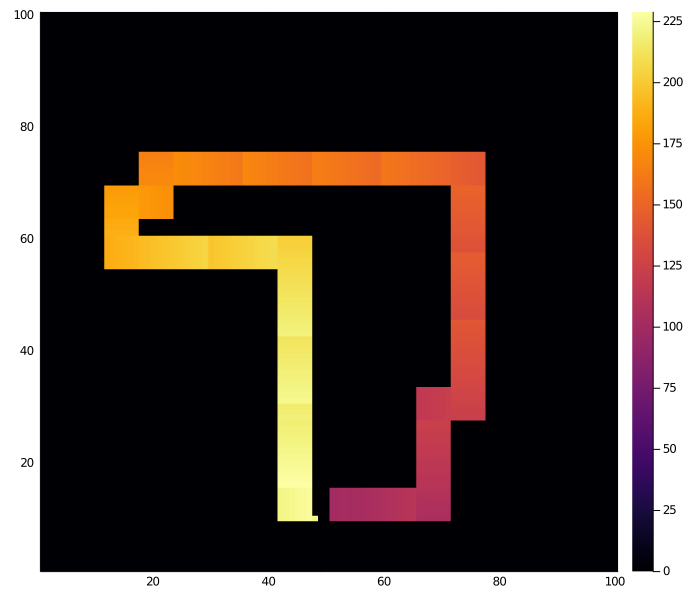

In [5]:
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]


build!(track1,L)
plot(heatmap(track1.road),size=(700,600))

Then our agent ${car}$ with the following attributes:

In [6]:
mutable struct car
    x::Float64
    y::Float64
    v::Float64
    angle::Float64
    a::Float64
    braq::Float64
    vmax::Float64
end

function car(x::Float64,y::Float64,angle::Float64)
    car(x,y,0,angle,5,3,20) #angle CI
end

car

The ${move!}$ function distinguishes several cases, numbered from 1 t0 8 (clockwise order). 8, 1 and 2 represent a situation in which the car accelerates. 4, 5 and 6 in which the car brakes. In cases 2, 3 and 4 the car turns right and in cases 6, 7 and 8 the car turns left.

In [7]:
function move!(Car::car,input::Int64,dt::Float64)
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v>0
            delta = delta - 0.5*Car.a*(dt^2)
            Car.v = Car.v - Car.a*dt
        end
    end
    
    if input == 2 || input == 3 || input == 4
        braqv = Car.braq*(1 + 3*Car.v/Car.vmax) #intensity of tangential component of displacement vector changes?
        Car.angle = Car.angle - delta/braqv
    end
    
    if input == 6 || input == 7 || input == 8
        braqv = Car.braq*(1 + 3*Car.v/Car.vmax)
        Car.angle = Car.angle + delta/braqv
    end
    
    Car.x = Car.x + cos(Car.angle)*delta
    Car.y = Car.y + sin(Car.angle)*delta
end

move! (generic function with 1 method)

**THOMAS:** Tu n'incrémentes pas le braquage de la voiture?

## NEAT algorithm

We need first to define the different parameters we will be using when defining our different functions.

Thus, the following parameters and values are used as a reference:

## Structures used

In [8]:
mutable struct Node
    
    node_id::Int64
    node_type::String
    #"input", "output" or "hidden"
    value::Float64
    
end

In [9]:
function node(node_id::Int64, node_type::String)
    
    Node(node_id, node_type, 0.0)
end

node (generic function with 1 method)

In [10]:
mutable struct Connection
    
    input_node::Node #à préciser
    output_node::Node
    weight::Float64
    status::Bool
    #if status is false, then the connection is disabled
    innovation_number::Int64
    #this last parameter will allow historical marking
end

In [11]:
function connection(input_node::Node, output_node::Node, weight::Float64, innovation_number::Int64, status=true)
    
    Connection(input_node, output_node, weight, status, innovation_number)
end

connection (generic function with 2 methods)

In [12]:
Node1 = node(-1, "hidden")
Node2 = node(-1, "hidden")

connection1 = connection(Node1, Node2, -1.0, -1)

Connection(Node(-1, "hidden", 0.0), Node(-1, "hidden", 0.0), -1.0, true, -1)

In [13]:
mutable struct Network
    
    node_genes::Array{Node}
    connection_genes::Array{Connection}
    fitness::Float64
    adjusted_fitness::Float64
end

In [14]:
function network(nb_inputs=6::Int64, nb_outputs=6::Int64)
    
    innovation_number = 1
    
    #creating node_genes list
    node_genes = Array{Node}(undef, 0)
    
    #adding all input nodes to node_genes
    for i in 1:nb_inputs
        new_input = node(i, "input")
        push!(node_genes, new_input)
    end
    #adding all output nodes to node_genes
    for i in 1:nb_outputs
        new_output = node(nb_inputs+i, "output")
        push!(node_genes, new_output)
    end
    
    #creating connection_genes list
    connection_genes = Array{Connection}(undef, 0)
    
    for i in 1:nb_inputs
        for j in 1:nb_outputs
            new_weight = rand()
            new_connection = connection(node_genes[i], node_genes[nb_inputs+j], new_weight, innovation_number)
            push!(connection_genes, new_connection)
            innovation_number +=1
        end
    end    
    
    Network(node_genes, connection_genes, 0.0, 0.0)
end 

network (generic function with 3 methods)

In [15]:
network2 = network()
#by default we have 6 inputs and 6 outputs

Network(Node[Node(1, "input", 0.0), Node(2, "input", 0.0), Node(3, "input", 0.0), Node(4, "input", 0.0), Node(5, "input", 0.0), Node(6, "input", 0.0), Node(7, "output", 0.0), Node(8, "output", 0.0), Node(9, "output", 0.0), Node(10, "output", 0.0), Node(11, "output", 0.0), Node(12, "output", 0.0)], Connection[Connection(Node(1, "input", 0.0), Node(7, "output", 0.0), 0.940515, true, 1), Connection(Node(1, "input", 0.0), Node(8, "output", 0.0), 0.673959, true, 2), Connection(Node(1, "input", 0.0), Node(9, "output", 0.0), 0.395453, true, 3), Connection(Node(1, "input", 0.0), Node(10, "output", 0.0), 0.313244, true, 4), Connection(Node(1, "input", 0.0), Node(11, "output", 0.0), 0.662555, true, 5), Connection(Node(1, "input", 0.0), Node(12, "output", 0.0), 0.586022, true, 6), Connection(Node(2, "input", 0.0), Node(7, "output", 0.0), 0.0521332, true, 7), Connection(Node(2, "input", 0.0), Node(8, "output", 0.0), 0.26864, true, 8), Connection(Node(2, "input", 0.0), Node(9, "output", 0.0), 0.108

We will have to set input values before starting the algorithm.

In [16]:
function set_input_values!(input_values::Array{Float64}, individual::Network)#input values has to be of size 6
    
    inputs = copy(input_values)
    
    for i in 1:6
        
        individual.node_genes[i].value = inputs[i]
    end
end

set_input_values! (generic function with 1 method)

In [17]:
#input_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#set_input_values!(input_values, network1)
#network1

Definition of the structure "NEAT"

In [18]:
mutable struct NEAT
    #mr stands for mutation rate
    mr_change_weight::Float64
    
    #if a change of weight occurs, the following rates are applied
    mr_change_weight_uniform::Float64
    mr_change_weight_random::Float64
    #the previous mr is equal to 1-mr_change_weight_uniform

    mr_add_node::Float64
    mr_add_connection::Float64
    
    percentage_no_co::Float64
    #percentage of the population on which mutations are directly applied without the crossover step
    
    #parameters measuring the distance between two topologies
    c1::Float64
    c2::Float64
    c3::Float64
    threshold::Float64
    
    pop_size::Int64
    population::Array{Network}
    #offspring::Array{Network}
end

In [19]:
function NEAT(;pop_size=150::Int64, mr_change_weight=0.8::Float64, mr_change_weight_uniform=0.9::Float64, mr_change_weight_random=0.1::Float64, mr_add_node=0.03::Float64, 
        mr_add_connection=0.05::Float64, percentage_no_co=1.0::Float64, c1=1.0::Float64, c2=1.0::Float64, c3=0.4::Float64, threshold=3.0::Float64)
    
    population = Array{Network}(undef, pop_size)
    #offspring = Array{Network}(undef, pop_size)
    
    NEAT(mr_change_weight, mr_change_weight_uniform, mr_change_weight_random, mr_add_node, mr_add_connection, percentage_no_co, 
        c1, c2, c3, threshold, pop_size, population)
end

NEAT

In [20]:
set = NEAT()

NEAT(0.8, 0.9, 0.1, 0.03, 0.05, 1.0, 1.0, 1.0, 0.4, 3.0, 150, Network[#undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef  …  #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef])

## Definition of objective function and computing fitness

In [21]:
function objective(individual::Network, tr::track)
    
    #NN = SimpleNN(genes)
    fit = race(individual,tr,dt,dx,ci) #redéfinition de la fonction race à prévoir, et ici on essaie de maximiser la fitness
end

objective (generic function with 1 method)

And of the activation function...

In [22]:
function sismoid(x::Float64)
    
    res = 1/(1+exp(-0.5*x))
    return res
end   

sismoid (generic function with 1 method)

In [23]:
res = sismoid(0.5)

0.5621765008857981

In [24]:
function set_nodes_value!(input_values::Array{Float64}, individual::Network, bool::Bool)
   
    if bool
        set_input_values!(input_values, individual)
    end
    
    #print("OK first")
    n =length(individual.node_genes)
    
    for i in 7:n
        
        node = individual.node_genes[i]
        node.value = 0.0
        
        for co in individual.connection_genes
            
            if node == co.output_node &&co.status
                
                node.value += co.weight*co.input_node.value
            end
        end
        
        node.value = sismoid(node.value)
    end

end

set_nodes_value! (generic function with 1 method)

In [25]:
input_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
network3 = network()
print(network3.node_genes)
print("\n\n")
set_nodes_value!(input_values, network3)
print(network3.node_genes)

Node[Node(1, "input", 0.0), Node(2, "input", 0.0), Node(3, "input", 0.0), Node(4, "input", 0.0), Node(5, "input", 0.0), Node(6, "input", 0.0), Node(7, "output", 0.0), Node(8, "output", 0.0), Node(9, "output", 0.0), Node(10, "output", 0.0), Node(11, "output", 0.0), Node(12, "output", 0.0)]



MethodError: MethodError: no method matching set_nodes_value!(::Array{Float64,1}, ::Network)
Closest candidates are:
  set_nodes_value!(::Array{Float64,N} where N, ::Network, !Matched::Bool) at In[24]:3

## Mutation step with historical marking



In [26]:
function get_index_first_output(individual::Network)
    
    index = 7 #by default without hidden nodes
    nodes = individual.node_genes
    len = length(nodes)
    
    for i in 1:len
        if nodes[i].node_type == "output"
            index = i
            break
        end
    end
    
    return index
end

get_index_first_output (generic function with 1 method)

In [27]:
get_index_first_output(network2)

7

The next two functions will be used in the case of a mutation, if a node or a connection is added.

In [28]:
function add_node!(co::Connection, individual::Network, node_type::String)
    
    
    new_node = node(length(individual.node_genes) + 1, node_type)
    index = get_index_first_output(individual)
    insert!(individual.node_genes, index, new_node) #adding new node created to the list of existing nodes at first occurence of output
    
    input = co.input_node
    output = co.output_node
    
    #creating connection between input and hidden node
    co.status = false
    new_connection = connection(input, new_node, 1.0, individual.connection_genes[length(individual.connection_genes)].innovation_number + 1)
    #this connection weight is set to 1.0
    push!(individual.connection_genes, new_connection)
    
    #creating connection between hidden node and output with new weight value
    innovation_number = individual.connection_genes[length(individual.connection_genes)].innovation_number + 1 #to be defined at the beginning of the algorithm
    new_connection_bis = connection(new_node, output, co.weight, innovation_number)
    #doing this we don't need to use the sismoid function once again applied to the output node
    push!(individual.connection_genes, new_connection_bis)
    
end 

add_node! (generic function with 1 method)

In [29]:
function add_connection!(individual::Network, input::Node, output::Node)
    
    innovation_number = individual.connection_genes[length(individual.connection_genes)].innovation_number + 1
    new_weight = rand()
    new_connection = connection(input, output, new_weight, innovation_number)
    
    push!(individual.connection_genes, new_connection)
end 

add_connection! (generic function with 1 method)

**WE HAVE TO PREVENT HERE THE POSSIBILITY OF ADDING A CONNEXION ENDING WITH AN INPUT OR STARTING WITH AN OUPUT**

We should allow a connection only if input.node_id < output.node_id and output.node_id > nb_inputs or 7<=output.node_id<13

The following function changes the weight of a connection according to __mr_change_weight__ probability.

In [30]:
function change_weight!(connection::Connection, mr_change_weight::Float64, mr_change_weight_uniform::Float64, sd::Float64)
    
    #sd represents the standard deviation of a Gaussian distribution
    r = rand()
    
    if r < mr_change_weight
        
        new_r = rand()
        
        if new_r < mr_change_weight_uniform
            
            d = Normal(connection.weight, sd)
            connection.weight = min(rand(d),0.99)
            #println("Uniform change weight")
            #giving new weight according to previous one using Normal distribution
        else
            
            connection.weight = rand()
            #giving completely new weight to the connection
            #println("Random change weight")
        end
    end
end     

change_weight! (generic function with 1 method)

When the mutation step is finished, we need to use once again the activation function to reset a new outputnode value.

In [31]:
function set_new_value!(individual::Network, node_id::Int64)
    """ATTENTION"""
    k = findall(x->x.node_id == node_id, individual.node_genes)
    node = individual.node_genes[k] #là cela devrait être bon
    res = 0.0
    
    for connection in individual.connection_genes
        
        if connection.output_node.node_id == node.node_id && connection.status #we also have to check is the connection is enabled
            
            res += connection.weight
        end
    end
    
    individual.node_genes[k].value = sismoid(res)
end
    

set_new_value! (generic function with 1 method)

In [32]:
l = [0, 1, 3, 2]
findall(x->x==2, l)

1-element Array{Int64,1}:
 4

In [33]:
function mutate!(parameters::NEAT, individual::Network)
    
    n = length(individual.connection_genes)
    for i in 1:n
        if individual.connection_genes[i].status
            change_weight!(individual.connection_genes[i], parameters.mr_change_weight, parameters.mr_change_weight_uniform, 0.1)
        end
    end
    
    
    
    for i in 1:n
        r = rand()
        if r < parameters.mr_add_node
            #println("Adding node")
            add_node!(individual.connection_genes[i], individual, "hidden")
            #println("Node added")
        end
    end
    
    m = length(individual.node_genes)
    
    for i in 1:m-6 #only if i not an output
        for j in i:m #to prevent cycles
            
            if j>6 #only if j not an input
                r =rand()
                if r < parameters.mr_add_connection
                    #println("Adding connection")
                    add_connection!(individual, individual.node_genes[i], individual.node_genes[j])
                    #println("Connection added")
                end
            end
        end
    end
end

mutate! (generic function with 1 method)

## Crossover step/Aligning genomes

Need for a function lining genomes two by two.

In [34]:
function matching_pairs(connection_genes1::Array{Connection}, connection_genes2::Array{Connection})
    
    matching_pairs_array = Array{Tuple}(undef, 0)
    
    for i in 1:length(connection_genes1)
        
        for j in 1:length(connection_genes2)
            
            if  connection_genes1[i].input_node.node_id == connection_genes2[j].input_node.node_id && connection_genes1[i].output_node.node_id == connection_genes2[j].output_node.node_id
                push!(matching_pairs_array, (i, j))
                break
            end
        end
    end
    
    return matching_pairs_array
end
    

matching_pairs (generic function with 1 method)

In [35]:
function aligning_genomes(individual1::Network, individual2::Network)
    
    new_connection_genes1 = Array{Connection}(undef, 0)
    new_connection_genes2 = Array{Connection}(undef, 0)
    new_node_genes = Array{Node}(undef, 0)
    
    disjoint_connection = connection(node(0, "hidden"), node(0, "hidden"), 0.0, 0)
    excess_connection = connection(node(0, "hidden"), node(0, "hidden"), 0.0, -1)
    #disjoint is referred to as innovation number 0 and excess_connection as -1
    """NUMBER OF INPUTS = 6 here"""
    for i in 1:6 #possibly change values here 
        
        new_node = individual1.node_genes[i]
        push!(new_node_genes, new_node)
        
    end
    """NUMBER OF OUTPUTS = 6 here"""
    for i in length(individual1.node_genes)-5:length(individual1.node_genes) #change values here
        
        new_node = individual1.node_genes[i]
        push!(new_node_genes, new_node)
    end
    #after these steps, six elements should have been copied
    
    
    for node1 in individual1.node_genes
        
        for node2 in individual2.node_genes
            
            if node1.node_id == node2.node_id && node1.node_type == "hidden"
                break
            end
        end
        
        if node1.node_type != "input" && node1.node_type != "output"
            
            new_node = node(node1.node_id, node1.node_type)
            insert!(new_node_genes, length(new_node_genes)-1, new_node)
        end
    end
    
    for node2 in individual2.node_genes
        
        flag = true
        
        for node in new_node_genes
            if node2.node_id == node.node_id
                
                flag = false
                break
            end
        end
        
        if flag
            
            new_node = node(node2.node_id, node2.node_type)
            insert!(new_node_genes, length(new_node_genes)-1, new_node)
        end
        
    end
    
    #after this step, new_node_genes is generated with all previous nodes
    """Jusque là tout est OK"""
    
    #Now defining new_connection_genes twice
    k = max(length(individual1.connection_genes), length(individual2.connection_genes))
    
    if k == length(individual1.connection_genes)
        
        big_connection_genes = deepcopy(individual1.connection_genes)
        small_connection_genes = deepcopy(individual2.connection_genes)
        
    else
        big_connection_genes = deepcopy(individual2.connection_genes)
        small_connection_genes = deepcopy(individual1.connection_genes)
    end
    #choosing individual whose genome has the greatest length
    
    matching_pairs_array = matching_pairs(small_connection_genes, big_connection_genes)
    
    """print(matching_pairs_array)
    print("\n\n")"""
    
    """TO REMOVE AFTERWARDS"""
    
    
    small_connection_genes[1].innovation_number = 1 #maybe useless
    big_connection_genes[1].innovation_number = 1 #maybe useless
    
    push!(new_connection_genes1, small_connection_genes[1])
    push!(new_connection_genes2, big_connection_genes[1]) #we initialize
    
    
    for i in 2:length(matching_pairs_array)
        
        a,b = matching_pairs_array[i]
        old_a, old_b = matching_pairs_array[i-1]
        
        if a == b && old_a == old_b
            
            k_a = a - old_a - 1 #number of elements between old_a and a
            
            for j in a:length(small_connection_genes) #we add first the connection of small_connection_gene, then of big_connection_genes, hence old_a+2 and old_b+1
                
                small_connection_genes[j].innovation_number += k_a
            end #this step does nothing if a immediately after old_a
            
            for j in old_b+1:length(big_connection_genes) 
                
                big_connection_genes[j].innovation_number += k_a
            end 
            
            if k_a > 0
                for j in 1:k_a
                    push!(new_connection_genes1, small_connection_genes[old_a + j])
                    push!(new_connection_genes2, disjoint_connection)
                end
                
                for j in 1:k_a
                    push!(new_connection_genes1, disjoint_connection)
                    push!(new_connection_genes2, big_connection_genes[old_b + j])
                end
            end
            
            push!(new_connection_genes1, small_connection_genes[a])
            push!(new_connection_genes2, big_connection_genes[a])
        end
        
        if a != b && old_a == old_b
            
            k_a = a - old_a - 1
            k_b = b - old_b - 1
            
            #distinguer les cas entre k_b<k_a et k_a<k_b
            
            for j in old_b+1: length(big_connection_genes)
                
                big_connection_genes[j].innovation_number += k_a
            end
            
            for j in a:length(small_connection_genes)
                
                small_connection_genes[j].innovation_number += k_b
            end
            
            if k_a>0
                
                for j in 1:k_a
                    
                    push!(new_connection_genes1, small_connection_genes[old_a + j])
                    push!(new_connection_genes2, disjoint_connection)
                end
            end
            
            if k_b>0
                
                for j in 1:k_b
                    
                    push!(new_connection_genes1, disjoint_connection)
                    push!(new_connection_genes2, big_connection_genes[old_b + j])
                end
            end
            
            push!(new_connection_genes1, small_connection_genes[a])
            push!(new_connection_genes2, big_connection_genes[b])      
                
        end
        
        if a == b && old_a != old_b #same thing than previous step
            
            k_a = a - old_a - 1
            k_b = b - old_b - 1
            
            #distinguer les cas entre k_b<k_a et k_a<k_b
            
            for j in old_b+1: length(big_connection_genes)
                
                big_connection_genes[j].innovation_number += k_a
            end
            
            for j in a:length(small_connection_genes)
                
                small_connection_genes[j].innovation_number += k_b
            end
            
            if k_a>0
                
                for j in 1:k_a
                    
                    push!(new_connection_genes1, small_connection_genes[old_a + j])
                    push!(new_connection_genes2, disjoint_connection)
                end
            end
            
            if k_b>0
                
                for j in 1:k_b
                    
                    push!(new_connection_genes1, disjoint_connection)
                    push!(new_connection_genes2, big_connection_genes[old_b + j])
                end
            end
            
            push!(new_connection_genes1, small_connection_genes[a])
            push!(new_connection_genes2, big_connection_genes[b])
        end
        
        if a!=b && old_a != old_b #again same thing
            
            k_a = a - old_a - 1
            k_b = b - old_b - 1
            
            #distinguer les cas entre k_b<k_a et k_a<k_b
            
            for j in old_b+1: length(big_connection_genes)
                
                big_connection_genes[j].innovation_number += k_a
            end
            
            for j in a:length(small_connection_genes)
                
                small_connection_genes[j].innovation_number += k_b
            end
            
            if k_a>0
                
                for j in 1:k_a
                    
                    push!(new_connection_genes1, small_connection_genes[old_a + j])
                    push!(new_connection_genes2, disjoint_connection)
                end
            end
            
            if k_b>0
                
                for j in 1:k_b
                    
                    push!(new_connection_genes1, disjoint_connection)
                    push!(new_connection_genes2, big_connection_genes[old_b + j])
                end
            end
            
            push!(new_connection_genes1, small_connection_genes[a])
            push!(new_connection_genes2, big_connection_genes[b])
        end
            
    end
    
    """ATTENTION, il faut ajouter les connections restantes"""
    
    a, b = matching_pairs_array[length(matching_pairs_array)]
    
    l1 = length(small_connection_genes) - a
    l2 = length(big_connection_genes) - b
    
    if l2>0
        
        for j in b+1:length(big_connection_genes)
            
            big_connection_genes[j].innovation_number += l1
        end
    end
    
    if l1>0
                
        for j in 1:l1
                    
            push!(new_connection_genes1, small_connection_genes[a + j])
            push!(new_connection_genes2, disjoint_connection)
        end
    end
            
    if l2>0
                
        for j in 1:l2
                    
            push!(new_connection_genes1, excess_connection)
            push!(new_connection_genes2, big_connection_genes[b + j])
        end
    end
            
    
    
            
    return new_node_genes, new_connection_genes1, new_connection_genes2

end

aligning_genomes (generic function with 1 method)

## Speciating the individuals

We will have here to speciate individuals according to their topological differences.

In [36]:
function measure_distance(parameters::NEAT, individual1::Network, individual2::Network)
    
    node_genes, connection_genes1, connection_genes2 = aligning_genomes(individual1, individual2)
    
    c1 = parameters.c1
    c2 = parameters.c2
    c3 = parameters.c3
    
    nb_disjoint = 0
    nb_excess = 0
    avg_weight_dist = 0.0
    nb_matching_genes = 0
    
    delta = 0.0
    N = max(length(connection_genes2), 1) #to avoid a division by zero
    
    for i in 1:length(connection_genes1)
        
        if connection_genes1[i].innovation_number == 0 || connection_genes2[i].innovation_number == 0
            
            nb_disjoint += 1
        end
        
        if connection_genes1[i].innovation_number == -1 || connection_genes2[i].innovation_number == -1
            
            nb_excess +=1
        end
        
        if connection_genes1[i].innovation_number >0 && connection_genes2[i].innovation_number > 0
            
            avg_weight_dist += (connection_genes1[i].weight-connection_genes2[i].weight)^2
            nb_matching_genes += 1
        end
        
    end
    nb_matching_genes = max(1, nb_matching_genes) #to avoid a division by zero
    
    delta = (nb_disjoint*c1+nb_excess*c2)/N + c3*sqrt(avg_weight_dist)/nb_matching_genes
    
    return delta
end    

measure_distance (generic function with 1 method)

In [37]:
network1 = deepcopy(network2)


"""add_node!(network1.connection_genes[3], network1, "hidden")
add_connection!(network1, network1.node_genes[1], network1.node_genes[length(network1.node_genes)-2])
add_node!(network1.connection_genes[6], network1, "hidden");
"""


"add_node!(network1.connection_genes[3], network1, \"hidden\")\nadd_connection!(network1, network1.node_genes[1], network1.node_genes[length(network1.node_genes)-2])\nadd_node!(network1.connection_genes[6], network1, \"hidden\");\n"

In [38]:
network2
"""add_node!(network2.connection_genes[4], network2, "hidden")
add_node!(network2.connection_genes[5], network2, "hidden");"""

"add_node!(network2.connection_genes[4], network2, \"hidden\")\nadd_node!(network2.connection_genes[5], network2, \"hidden\");"

In [39]:
"""node_genes, new_connection_genes1, new_connection_genes2 = aligning_genomes(network1, network2) #network2 is the smallest genome

print("\nThis is small connection genes array:\n")
print(new_connection_genes1)
print("\n\nThis is biggest connection genes array:\n\n")
print(new_connection_genes2)"""

"node_genes, new_connection_genes1, new_connection_genes2 = aligning_genomes(network1, network2) #network2 is the smallest genome\n\nprint(\"\nThis is small connection genes array:\n\")\nprint(new_connection_genes1)\nprint(\"\n\nThis is biggest connection genes array:\n\n\")\nprint(new_connection_genes2)"

In [40]:
measure_distance(set, network2, network1)

0.0

We then need to define a function placing individuals into species at each iteration.

In [41]:
function speciate!(parameters::NEAT, population::Array{Network}, representatives::Array{Network})
    
    threshold = parameters.threshold
    n = length(representatives)
    pop_size = length(population)
    
    
    species = Array{Array{Network}}(undef, n) #we create an array of nb_species from previous generation
    
    for i in 1:n
        species[i] = Array{Network}(undef, 0)
    end
        
    new_specimens = Array{Network}(undef, 0)
    nb_new_species = 0
    
    for i in 1:pop_size
        flag = true
        
        for j in 1:n
            
            d1 = measure_distance(parameters, population[i], representatives[j])
            if d1 <= threshold
                push!(species[j], population[i])
                flag = false
                break
            end
        end
        
        if flag
            
            if length(new_specimens) == 0
                
                push!(new_specimens, population[i])#we actualize the reference new specimens
                new_species = Array{Array{Network}}(undef, 0) #we create an array composed of groups of individuals grouped by new species, pop_size is a limit
                push!(new_species, Array{Network}(undef, 0))
                push!(new_species[1], population[i]) #we group individuals from the same new species
                nb_new_species += 1
                
            else
                flag2 = true
                new_species_id = 0
                
                for k in 1:length(new_specimens)
                    
                    d2 = measure_distance(parameters, population[i], new_specimens[k])
                    if d2 <= threshold
                        flag2 = false
                        new_species_id = k
                        break
                    end
                end
                
                if flag2
                    
                    push!(new_specimens, population[i])#we add another new specimen
                    push!(new_species, Array{Network}(undef, 0))
                    push!(new_species[nb_new_species+1], population[i])
                    nb_new_species +=1
                    
                else
                    
                    push!(new_species[new_species_id], population[i])
                end
            end
                        
            
        end
    end
    
    for i in 1:n
        
        representatives[i] = copy(species[i][1])
    end
    
    if nb_new_species>0
        
        for i in 1:nb_new_species
            push!(species, new_species[i])
            push!(representatives, new_specimen[i])
        end
    end
    representatives, species    
end

speciate! (generic function with 1 method)

In [42]:
test = NEAT(pop_size=10)
for i in 1:test.pop_size
    test.population[i] = network()
end

test_representatives = Array{Network}(undef, 1)
test_representatives[1] = test.population[1]

test_species = Array{Array{Network}}(undef, 1)
test_species[1] = Array{Network}(undef, test.pop_size)
    
for i in 1:test.pop_size
        
        test_species[1][i] = test.population[i]
end

test_representatives, test_species = speciate!(test, test.population, test_representatives, test_species)


MethodError: MethodError: no method matching speciate!(::NEAT, ::Array{Network,1}, ::Array{Network,1}, ::Array{Array{Network,N} where N,1})
Closest candidates are:
  speciate!(::NEAT, ::Array{Network,N} where N, ::Array{Network,N} where N) at In[41]:3

## Final steps

We need to define a function adjusting fitness values.

In [43]:
function adjusting_fitness!(parameters::NEAT, species::Array{Array{Network}})
    
    sum = 0
    nb_surviving = Array{Int64}(undef, length(species))
    new_pop_size = 0
    
    for i in 1:length(species)
        n = length(species[i])
        for j in 1:n
            species[i][j].adjusted_fitness = species[i][j].fitness/n
            sum += species[i][j].adjusted_fitness
        end
    end
    
    for i in 1:length(species)
        n = length(species[i])
        sum_species = 0
        for j in 1:n
            sum_species += species[i][j].adjusted_fitness
        end
        nb_surviving[i] = floor(Int, parameters.pop_size*sum_species/sum)
        new_pop_size += nb_surviving[i]
    end
    
    parameters.pop_size = new_pop_size
    
    return nb_surviving
end    

adjusting_fitness! (generic function with 1 method)

In [44]:
function get_adjusted_fitness(individual::Network)
    
    individual.adjusted_fitness
end

get_adjusted_fitness (generic function with 1 method)

In [45]:
function sort_within_species!(species::Array{Array{Network}})
    
    for i in eachindex(species)
        
        sort!(species, by=get_adjusted_fitness, rev=true)
    end
end

sort_within_species! (generic function with 1 method)

In [46]:
function select!(parameters::NEAT, species::Array{Array{Network}})
    
    nb_survivors = adjusting_fitness!(parameters, species)
    #println(nb_survivors)
    sort_within_species!(species)
    
    parameters.population = Array{Network}(undef, parameters.pop_size)
    k = 0
    
    
    for i in 1:length(nb_survivors)
        #println("i:", i)
        if nb_survivors[i] > 0
            #println("nb_survivors_i",nb_survivors[i])
            for j in 1: nb_survivors[i]
                
                #println("K+J:", k+j)
                parameters.population[k+j] = copy(species[i][j])
            end
            k+=nb_survivors[i]
        end
        #println("OK")
    end
end
    
    

select! (generic function with 1 method)

# Making the agent race!

**Communication NN - Simulation :**  
6 sorties :   
O1:accélérer, O2:freiner, O3:Vconstante, O4:tourner à gauche, O5: tourner à droite, O6: tout droit 

In [47]:
function getNNoutput(inputs::Array{Float64}, NN::Network)
    output=0
    outputs = [NN.node_genes[i].value for i in length(NN.node_genes)-5:length(NN.node_genes)]
    accel=findmax(outputs[1:3])[2] #on récupère la position ici seulement et pas la valeur
    dir=findmax(outputs[4:6])[2] #idem
    
    if accel == 1 #on accélère
        if dir == 6
            output = 1 #on accélère et on va tout droit
        elseif dir ==4
            output = 2 #on accélère et on tourne à droite
        else
            output=8 #on accélère et on tourne à gauche
        end
        
    elseif accel == 2 #on freine
        if dir == 6
            output = 5 #on freine et on ne tourne pas les roues
        elseif dir == 4
            output = 4 # on freine et on tourne à droite
        else
            output= 6 #on freine et on tourne à droite 
        end
            
    elseif accel == 3 #on va en roue libre
        if dir == 6
            output = 9 #on ne fait rien
        elseif dir==4
            output=3 #on tourne à droite sans freiner/accélérer
        else
            output=7 #on toure à gauche sans freiner/accélérer
        end
    end  
    output
end

getNNoutput (generic function with 1 method)

Obtenir les distances aux murs : 

In [48]:
function see1(x::Float64,y::Float64,angle::Float64,dx::Float64,tr::track)
    X = zeros(Int(round(100/dx)))
    Y = zeros(Int(round(100/dx)))
    X[1] = copy(x)
    Y[1] = copy(y)
    value = tr.road[Int(floor(Y[1])),Int(floor(X[1]))]
    #println(X[1],Y[1])
    i = 2
    while value >0
        X[i] = X[i-1] + dx*cos(angle)
        Y[i] = Y[i-1] + dx*sin(angle)
        value = tr.road[Int(round(Y[i])),Int(round(X[i]))]
        i = i+1
    end
    dist = (i-1)*dx
    #(X[1:i-1],Y[1:i-1])
end

see1 (generic function with 1 method)

In [49]:
function see5(Car::car,dx::Float64,tr::track)
    gauche = see1(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche45 = see1(Car.x,Car.y,Car.angle+pi/4,dx,tr)
    devant = see1(Car.x,Car.y,Car.angle,dx,tr)
    droite45 = see1(Car.x,Car.y,Car.angle-pi/4,dx,tr)
    droite = see1(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche45,devant,droite45,droite)
end

see5 (generic function with 1 method)

In [50]:
function see1affichage(x::Float64,y::Float64,angle::Float64,dx::Float64,tr::track) #Retourne deux listes qui permettent de plot la vue de la voiture
    X = zeros(Int(round(100/dx)))
    Y = zeros(Int(round(100/dx)))
    X[1] = copy(x)
    Y[1] = copy(y)
    value = tr.road[Int(floor(Y[1])),Int(floor(X[1]))]
    #println(X[1],Y[1])
    i = 2
    while value >0
        X[i] = X[i-1] + dx*cos(angle)
        Y[i] = Y[i-1] + dx*sin(angle)
        value = tr.road[Int(round(Y[i])),Int(round(X[i]))]
        i = i+1
    end
    (X[1:i-1],Y[1:i-1])
end

function see5affichage(Car::car,dx,tr::track)
    gauche = see1affichage(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche45 = see1affichage(Car.x,Car.y,Car.angle+pi/4,dx,tr)
    devant = see1affichage(Car.x,Car.y,Car.angle,dx,tr)
    droite45 = see1affichage(Car.x,Car.y,Car.angle-pi/4,dx,tr)
    droite = see1affichage(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche45,devant,droite45,droite)
end

see5affichage (generic function with 1 method)

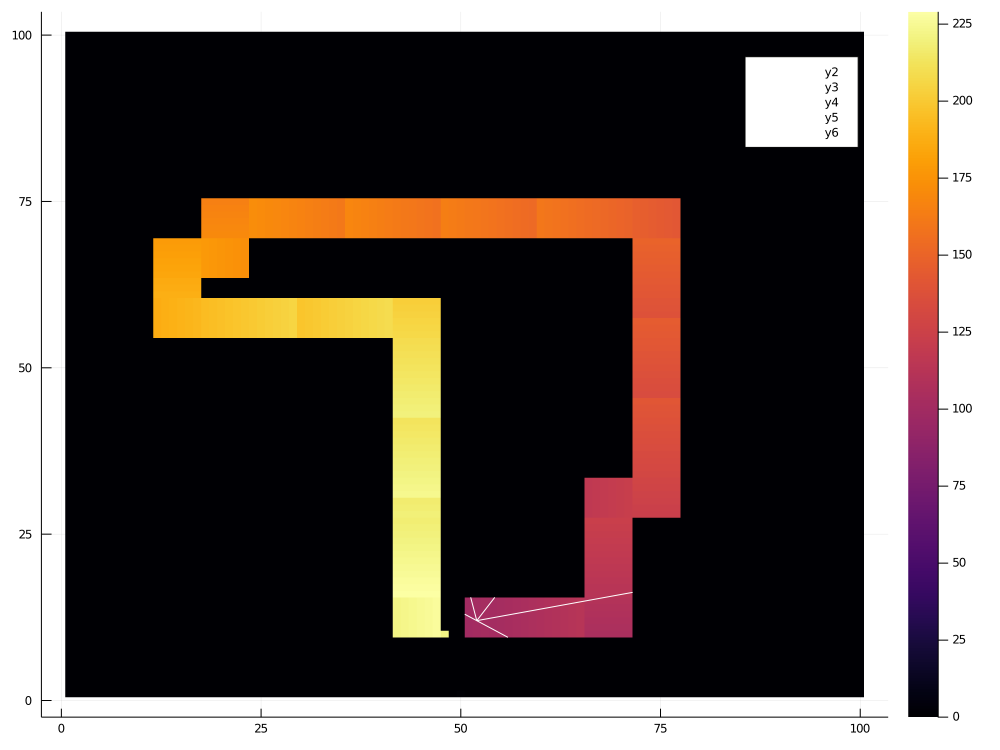

In [51]:
A = see5affichage(car(52.,12.,1.),0.01,track1)

plot(heatmap(track1.road,size = (1000,750)))
plot!(A[1],color = "white")
plot!(A[2],color = "white")
plot!(A[3],color = "white")
plot!(A[4],color = "white")
plot!(A[5],color = "white")

Obtenir les entrées pour le NN :

In [52]:
function getState(car1::car,dx::Float64,tr::track) 
    inputs=zeros(6)
    #println(see5(car1,dx,tr))
    inputs[1:5].=see5(car1,dx,tr)
    inputs[6]=car1.v
    #println(inputs)
    inputs
end 

getState (generic function with 1 method)

Fonction pour afficher la progression de la voiture : 

In [53]:
function affichage(X::Array{Float64},Y::Array{Float64},tr::track)
    for i in 1:size(X,1)
        x = Int(round(X[i]))
        y = Int(round(Y[i]))
        if x>0 && y>0
            tr.road[x,y]=150
        end
    end
    plot!(heatmap(tr.road),size=(700,600))
end

affichage (generic function with 1 method)

Exemple de track:

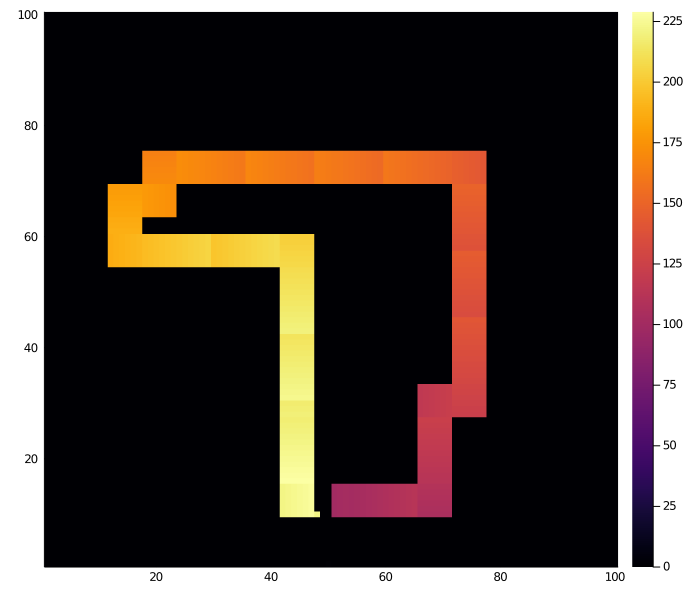

In [54]:
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
plot(heatmap(track1.road),size=(700,600))

In [55]:
function race(NN::Network,tr::track,dt::Float64,dx::Float64,ci::Array{Float64})
    tr2 = track(n)
    tr2.road = copy(tr.road)
    maxIter=300
    X=zeros(maxIter)
    Y=zeros(maxIter)
    plot(heatmap(tr2.road),size=(700,600))
    car1 = car(ci[1],ci[2],ci[3])
    canMoveB=true
    currentState=getState(car1,dx,tr2)
    compteur=1
    fitness=1
    value=1
    while value>0
         fitness=value
         x = Int(round(car1.x))
         y = Int(round(car1.y))
         if x>0 && y>0
             value = tr2.road[y,x]
         end
         X[compteur]=y
         Y[compteur]=x
         move!(car1,getNNoutput(currentState,NN),dt)
         currentState=getState(car1,dx,tr2)
         compteur+=1
        if compteur>=300
            value=0
        end
    end
    affichage(X,Y,tr2)
    fitness 
end

race (generic function with 1 method)

In [56]:
function find_best(population::Array{Network})
    
    best = 0.0
    index_best = 1
    n = length(population)
    for i in 1:n
        if population[i].fitness > best
            
            index_best = i
            best = population[i].fitness
        end
    end
    
    population[index_best]
end 
    

find_best (generic function with 1 method)

Stratégie d'apprentissage :
- I : on apprend au réseau de neuronne les bases de la conduite sur un circuit simple
- II : on affine le réseau sur deux autres circuits de complexité croissante 
- III : on test sur tout types de cicuits 

103


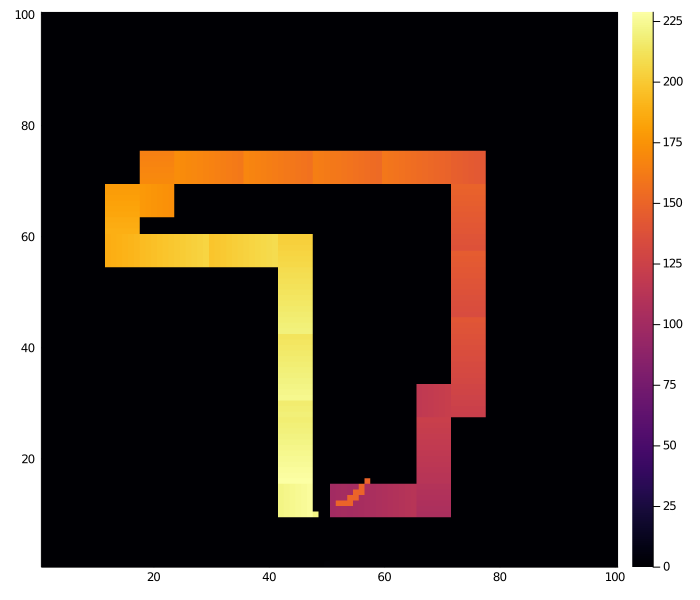

In [57]:
dt=0.06
dx=0.06
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
ci=[52.,12.,0*pi/180]
#println(see5(car(52.,12.,10*pi/180),dx,track1))

#genes = randn(N)
#NN=SimpleNN(genes)

println(race(network3,track1,dt,dx,ci))
current()
#A = see5affichage(car(52.,12.,0*pi/180),0.01,track1)
#plot!(A[1],color = "white")
#plot!(A[2],color = "white")
#plot!(A[3],color = "white")
#plot!(A[4],color = "white")
#plot!(A[5],color = "white")


Creation of easy track:

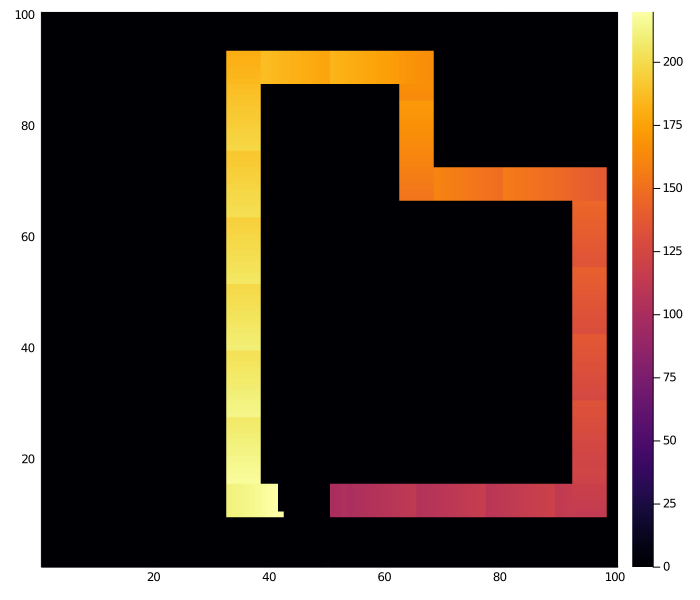

In [58]:
n = 100

trackFacile = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,1]
build!(trackFacile,L)
plot(heatmap(trackFacile.road),size=(700,600))

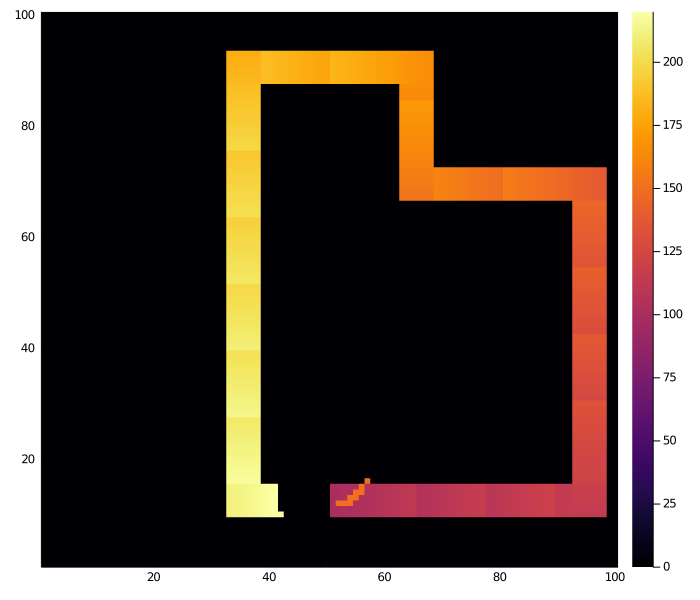

In [59]:
race(network3,trackFacile,dt,dx,ci)
current()

In [60]:
network3.node_genes

12-element Array{Node,1}:
 Node(1, "input", 0.0)  
 Node(2, "input", 0.0)  
 Node(3, "input", 0.0)  
 Node(4, "input", 0.0)  
 Node(5, "input", 0.0)  
 Node(6, "input", 0.0)  
 Node(7, "output", 0.0) 
 Node(8, "output", 0.0) 
 Node(9, "output", 0.0) 
 Node(10, "output", 0.0)
 Node(11, "output", 0.0)
 Node(12, "output", 0.0)

nbMaxIter=400
fitMax=600
n = 100
µ=4
λ=50

dx=0.1
dt=0.06

trackFacile = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,1]
build!(trackFacile,L)
ci=[52.,12.,-10*pi/180]

genes=CMAES_NNOptimization(nbMaxIter,fitMax,µ,λ,trackFacile)
NN = SimpleNN(genes)
println(race(NN,trackFacile,dt,dx,ci))

## Implementing NEAT algorithm

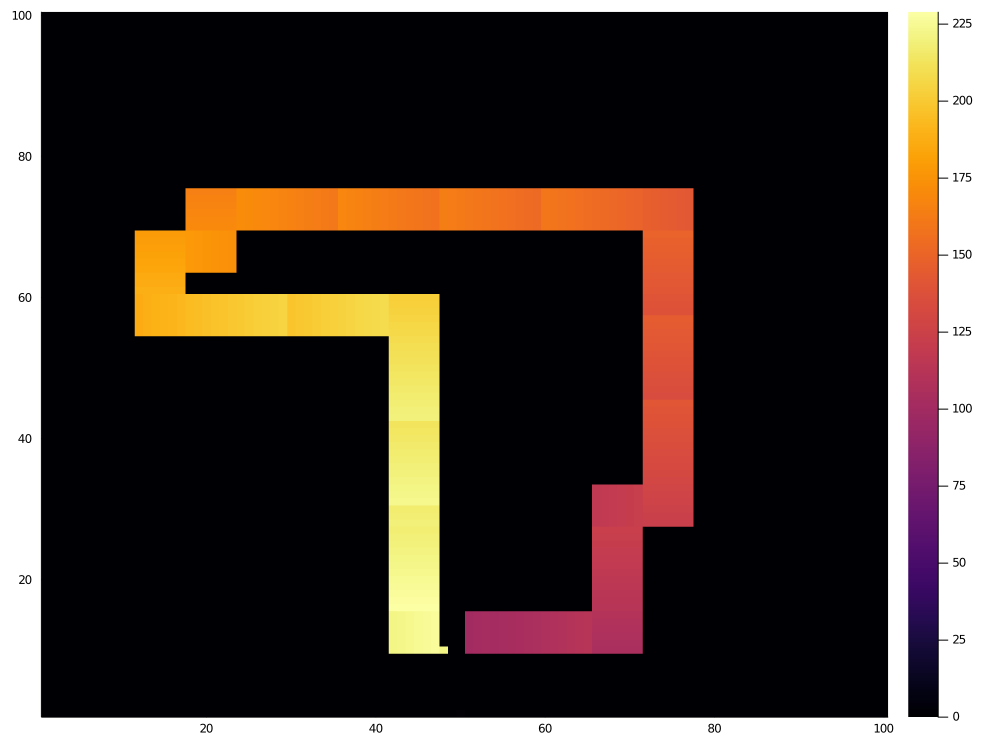

In [61]:
#Defining our parameters
parameters = NEAT()
for i in 1:parameters.pop_size
    parameters.population[i] = network()
end

"""#Defining time step and spatial step
dt=0.06
dx=0.06
n = 100"""

#Build the track
track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
"""#Setting initial conditions and plotting the circuit
ci=[52.,12.,0*pi/180]

#creating first car and inputs
car1 = car(ci[1], ci[2], ci[3])
inputs = getState(car1, dx, track1)
#setting first inputs
for i in 1:parameters.pop_size
    
    set_nodes_value!(inputs, parameters.population[i])
    
end"""

plot(heatmap(track1.road,size = (1000,750)))

In [62]:
println(parameters.population[1])

Network(Node[Node(1, "input", 0.0), Node(2, "input", 0.0), Node(3, "input", 0.0), Node(4, "input", 0.0), Node(5, "input", 0.0), Node(6, "input", 0.0), Node(7, "output", 0.0), Node(8, "output", 0.0), Node(9, "output", 0.0), Node(10, "output", 0.0), Node(11, "output", 0.0), Node(12, "output", 0.0)], Connection[Connection(Node(1, "input", 0.0), Node(7, "output", 0.0), 0.273538, true, 1), Connection(Node(1, "input", 0.0), Node(8, "output", 0.0), 0.782695, true, 2), Connection(Node(1, "input", 0.0), Node(9, "output", 0.0), 0.994789, true, 3), Connection(Node(1, "input", 0.0), Node(10, "output", 0.0), 0.66125, true, 4), Connection(Node(1, "input", 0.0), Node(11, "output", 0.0), 0.290004, true, 5), Connection(Node(1, "input", 0.0), Node(12, "output", 0.0), 0.957502, true, 6), Connection(Node(2, "input", 0.0), Node(7, "output", 0.0), 0.549786, true, 7), Connection(Node(2, "input", 0.0), Node(8, "output", 0.0), 0.273531, true, 8), Connection(Node(2, "input", 0.0), Node(9, "output", 0.0), 0.7333

In [63]:
function evaluate!(population::Array{Network})
    
    for i in 1:length(population)
        
        population[i].fitness = objective(population[i], track1)
        
    end
end
        

evaluate! (generic function with 1 method)

In [68]:
nb_generations = 25
#Defining time step and spatial step
dt=0.06
dx=0.06
n = 100


100

In [69]:
#Defining our parameters
parameters = NEAT(pop_size=70)
pop_size = parameters.pop_size
for i in 1:pop_size
    parameters.population[i] = network()
end
    
"""Jusque là c'est OK"""

function NEAT_Optimization!(parameters::NEAT, nb_generations, dt, dx, n)
    
    
    #Build the track
    track1 = track(n)
    L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
    
    build!(track1,L)
    #Setting initial conditions and plotting the circuit
    ci=[52.,12.,0*pi/180]
    
    #creating first car and inputs
    car1 = car(ci[1], ci[2], ci[3])
    inputs = getState(car1, dx, track1)
    
    #setting first inputs
    
    pop_size = parameters.pop_size
    for i in 1:pop_size
        set_nodes_value!(inputs, parameters.population[i], true)
    end

    #creating our first representative and our first species
    representatives = Array{Network}(undef, 1)
    #println("OK")
    population = parameters.population
    representatives[1] = population[1]
    #species = Array{Array{Network}}(undef, 1)
    #species[1] = Array{Network}(undef, 0)
    
    #for i in 1:pop_size
        
     #   push!(species[1][i], population[i])
    #end
    
    
    #loop over generations
    for i in 1:nb_generations
        
        #evaluation step
        evaluate!(population)
        best_individual = find_best(population)
        println(best_individual.fitness)
        #println("OK evaluate")
       
        #speciation then selection based on adjusted fitness
        representatives, species = speciate!(parameters, parameters.population, representatives)
        
        #println("OK speciate")
        select!(parameters, species) #population should be modified there
        #println("OK select")
        #mutation step
        pop_size = parameters.pop_size
        #maybe not necessary to have an offspring attribute
        for i in 1:pop_size
            
            mutate!(parameters, population[i])
        end
        println("OK mutate")
        println("Generation number:", i)
        #set all nodes value
        for i in 1:pop_size
            set_nodes_value!(inputs, population[i], false)
        end
        #println("OK set")
    end
    evaluate!(population)
    best_individual = find_best(population)
    race(best_individual,track1,dt,dx,ci)
end

NEAT_Optimization! (generic function with 1 method)

In [ ]:
NEAT_Optimization!(parameters, nb_generations, dt, dx, n)
current()

103.0
OK mutate
Generation number:1
103.0
OK mutate
Generation number:2
103.0
OK mutate
Generation number:3
103.0
OK mutate
Generation number:4
103.0
OK mutate
Generation number:5
103.0
OK mutate
Generation number:6
103.0
OK mutate
Generation number:7
103.0
OK mutate
Generation number:8
103.0
OK mutate
Generation number:9
103.0
OK mutate
Generation number:10
103.0
OK mutate
Generation number:11
103.0
OK mutate
Generation number:12
103.0
OK mutate
Generation number:13
103.0
OK mutate
Generation number:14
103.0
OK mutate
Generation number:15
103.0
OK mutate
Generation number:16
103.0
OK mutate
Generation number:17
103.0
OK mutate
Generation number:18
103.0
OK mutate
Generation number:19
103.0


In [67]:
a = 1.5
b = floor(Int, a)
typeof(b), b

(Int64, 1)